In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Ángulo de posición de la barra

In [31]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,len(snapshot)-1):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value
    vel  = snap['subhalo_001/Str/Velocities'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
#     archivo0 =  open('/home/ornela/python/barras/r50-r90-r200-Mgal_time.dat','a')
#     archivo0.write(str('%03d'% isnap) +'\t'+
#                str('%12.6f'% time) +'\t'+
#                str('%12.6f'% r50) +'\t'+
#                str('%12.6f'% r90) +'\t'+
#                str('%12.6f'% r200) +'\t'+
#                str('%12.6f'% Mgal) +'\n')
#     archivo0.close()
#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
    veloc, = np.where(r < r50)
    
    vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm


#calculo el raux
#     raux = 2*r50
#------------------------------------------------------------------------------------
    dd = range(0,25)+range(38,51)
    ss = range(25,31)+range(32,38)+range(51,len(snapshot)-1)
    if j in dd:
        raux = 2*r50
    elif j in ss:
        raux = r50
    elif j == 31:
        raux = 0.75
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    mask, = np.where( r < raux)
    
    A2max, rmax, phi = strng.a2max(mstr[mask], xn[mask], yn[mask], 20)

    phi = phi*180./pi
    
    if phi < 0:
        phi2= phi+360
    else: 
        phi2= phi
    phi2 = phi2/2.

#     print phi2

#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
#     archivo1 =  open('../barra_G1/A2max_time.dat','a')
#     archivo1.write(str('%s'% snapshot[j]) +'\t'+
#                    str('%12.6f'% time) +'\t'+
#                    str('%12.6f'% A2max) +'\n')
#     archivo1.close()

#     archivo2 =  open('../barra_G1/Rmax_time.dat','a')
#     archivo2.write(str('%s'% snapshot[j]) +'\t'+
#                str('%12.6f'% time) +'\t'+
#                str('%12.6f'% rmax) +'\n')
#     archivo2.close()

#     archivo3 =  open('../barra_G1/phi_time.dat','a')
#     archivo3.write(str('%s'%snapshot[j]) +'\t'+
#                str('%12.6f'% time) +'\t'+
#                str('%12.6f'% phi2) +'\n')
#     archivo3.close()

## A2max vs time

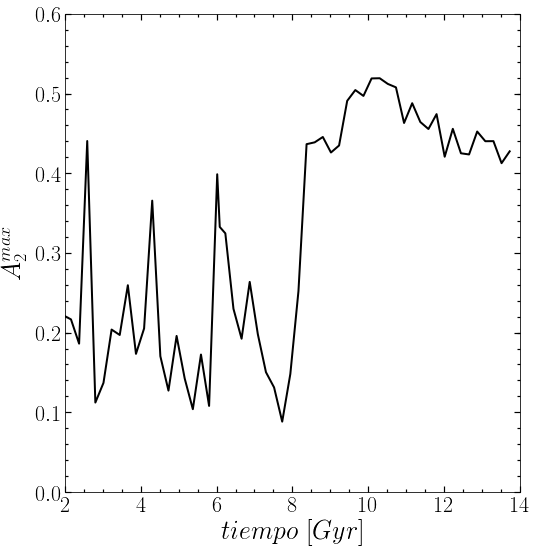

In [35]:
from __future__ import unicode_literals
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

cm0    = np.loadtxt('../barra_G1/A2max_time.dat')
t0    = cm0[:,1]
A2max0 = cm0[:,2]

cm1    = np.loadtxt('../barra_G1/A2max_time_test.dat')
t1     = cm1[:,1]
A2max1 = cm1[:,2]

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
# ax.plot(t1,A2max1,'-', lw=2, color='k')
ax.plot(t0,A2max0,'-', lw=2, color='k')
ax.set_xlim(2,14)
ax.set_ylim(0.,0.6)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
ax.set_ylabel(r'$A_{2}^{max}$',fontsize=26)#, color='lightgray')
fig.savefig('/z/omarioni/barraG1_salida/A2max_timeM31gs.png', dpi = 100)
plt.show()

## Phi vs time

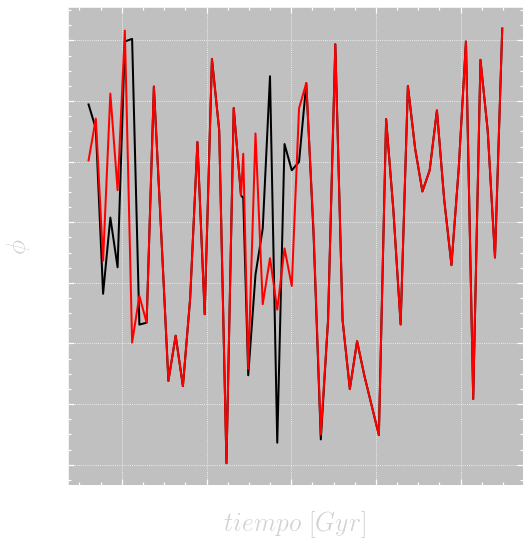

In [33]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

cm0 = np.loadtxt('../barra_G1/phi_time.dat')
t0  = cm0[:,1]
phi0 = cm0[:,2]

cm1 = np.loadtxt('../barra_G1/phi_time_test.dat')
t  = cm1[:,1]
phi = cm1[:,2]

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(t,phi,'-', lw=2, color='k')
ax.plot(t0,phi0,'-', lw=2, color='r')
#ax.set_xlim(2,14)
#ax.set_ylim(0.,0.5)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
ax.set_facecolor('silver')
ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26, color='lightgray')
ax.set_ylabel(r'$\phi$',fontsize=26, color='lightgray')
plt.show()

## Lbar vs tiempo

In [45]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,len(snapshot)-1):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value
    vel  = snap['subhalo_001/Str/Velocities'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
#     archivo0 =  open('/home/ornela/python/barras/r50-r90-r200-Mgal_time.dat','a')
#     archivo0.write(str('%03d'% isnap) +'\t'+
#                str('%12.6f'% time) +'\t'+
#                str('%12.6f'% r50) +'\t'+
#                str('%12.6f'% r90) +'\t'+
#                str('%12.6f'% r200) +'\t'+
#                str('%12.6f'% Mgal) +'\n')
#     archivo0.close()
#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
    veloc, = np.where(r < r50)
    
    vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm


#calculo el raux
#     raux = 2*r50
#------------------------------------------------------------------------------------
    dd = range(0,25)+range(38,51)
    ss = range(25,31)+range(32,38)+range(51,len(snapshot)-1)
    if j in dd:
        raux = 2*r50
    elif j in ss:
        raux = r50
    elif j == 31:
        raux = 0.75
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    mask, = np.where( r < raux)
    
    A2max, rmax, phi = strng.a2max(mstr[mask], xn[mask], yn[mask], 20)
    
    corte2, = np. where( r < 3*r50)
    
    A2, phi, rbin = strng.a2(mstr[corte2], xn[corte2], yn[corte2], 20)
    
    mask2, = np.where((rbin >= rmax))
    point = A2[mask2]
    rr    = rbin[mask2]
    hbar  = 0.15
    resta = point - hbar
    
    for kk,_ in enumerate(point):
        if resta[kk] < 0:
            break
            
    pend = (point[kk] - point[kk-1]) / (rr[kk] - rr[kk-1])
    y0 = (point[kk-1]*rr[kk] - point[kk]*rr[kk-1]) / (rr[kk] - rr[kk-1])
    
    lbar = (hbar - y0)/ pend
    
#    print lbar


#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    archivo1 =  open('../barra_G1/lbar_time.dat','a')
    archivo1.write(str('%s'% snapshot[j]) +'\t'+
               str('%12.6f'% time) +'\t'+
               str('%12.6f'% lbar) +'\n')
    archivo1.close()
#------------------------------------------------------------------------------------

# #test
#     print 'A2max=', A2max, 'rmax=', rmax
#     print 'lbar=', lbar
#     print snapshot[j], time
    
#     fig = plt.figure(2,figsize=(8,8))
#     fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
#     ax=fig.add_subplot(111)
#     ax.plot(rbin,A2,'ko-', lw=2, color = 'k')
#     ax.set_ylim(0,0.5)
#     ax.set_xlim(0,3)
#     #ax.set_title('subhalo_0'+ str('%s'%vector[i]), fontsize=24)
#     ax.spines['bottom'].set_color('w')
#     ax.spines['top'].set_color('w')
#     ax.spines['left'].set_color('w')
#     ax.spines['right'].set_color('w')
#     ax.minorticks_on()
#     ax.tick_params( labelsize=22, colors='w')
#     ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
#     ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
#     ax.set_facecolor('silver')
#     ax.grid(color='w',linestyle=':',which='major')
#     #ax.grid(color='lightgray',linestyle=':',which='minor')
#     ax.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26, color='w')
#     ax.set_ylabel(r'$A_{2}^{max}$',fontsize=26, color='w')
#     ax.axvline(x=lbar, color='r', lw=2, ls='--')
#     ax.axhline(y=hbar, color='r', lw=2, ls='--')
#     ax.axvline(x=rmax, color='b', lw=2, ls='--')
#     ax.axhline(y=A2max, color='b', lw=2, ls='--')


In [26]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,len(snapshot)-1):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value
    vel  = snap['subhalo_001/Str/Velocities'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
#     archivo0 =  open('/home/ornela/python/barras/r50-r90-r200-Mgal_time.dat','a')
#     archivo0.write(str('%03d'% isnap) +'\t'+
#                str('%12.6f'% time) +'\t'+
#                str('%12.6f'% r50) +'\t'+
#                str('%12.6f'% r90) +'\t'+
#                str('%12.6f'% r200) +'\t'+
#                str('%12.6f'% Mgal) +'\n')
#     archivo0.close()
#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
    veloc, = np.where(r < r50)
    
    vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm


#calculo el raux
#     raux = 2*r50
#------------------------------------------------------------------------------------
    dd = range(0,25)+range(38,51)
    ss = range(25,31)+range(32,38)+range(51,len(snapshot)-1)
    if j in dd:
        raux = 2*r50
    elif j in ss:
        raux = r50
    elif j == 31:
        raux = 0.75
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    corte3, = np.where(r<r90)

    A2, phi, rbin = strng.a2(mstr[corte3], xn[corte3], yn[corte3], 10)
    A2max, rmax, phimax = strng.a2max(mstr[corte3], xn[corte3], yn[corte3], 20)

    
# med = mean(phi[1:5])

    phii = phi - phimax

    for i in range(1,len(phii)-2):
        if ((phii[i]<np.arcsin(0.3)) & (phii[i]>-np.arcsin(0.3)) & (phii[i+1]>np.arcsin(0.3))):
            if ((phii[i+2]>np.arcsin(0.3)) | (phii[i+2]<-np.arcsin(0.3))):
                pend = (phii[i+1]-phii[i])/(rbin[i+1]-rbin[i])
                ordenada = phii[i]- pend*rbin[i]
                lbar = (np.arcsin(0.3) - ordenada)/pend
                break
        elif ((phii[i]>-np.arcsin(0.3)) & (phii[i]<np.arcsin(0.3)) & (phii[i+1]<-np.arcsin(0.3))):
            if ((phii[i+2]>np.arcsin(0.3)) | (phii[i+2]<-np.arcsin(0.3))):
                pend = (phii[i+1]-phii[i])/(rbin[i+1]-rbin[i])
                ordenada = phii[i]- pend*rbin[i]
                lbar = (-np.arcsin(0.3) - ordenada)/pend
                break
#     print lbar

    #Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    archivo1 =  open('../barraG1_salida/lbar_time2.dat','a')
    archivo1.write(str('%s'% snapshot[j]) +'\t'+
               str('%12.6f'% time) +'\t'+
               str('%12.6f'% lbar) +'\n')
    archivo1.close()

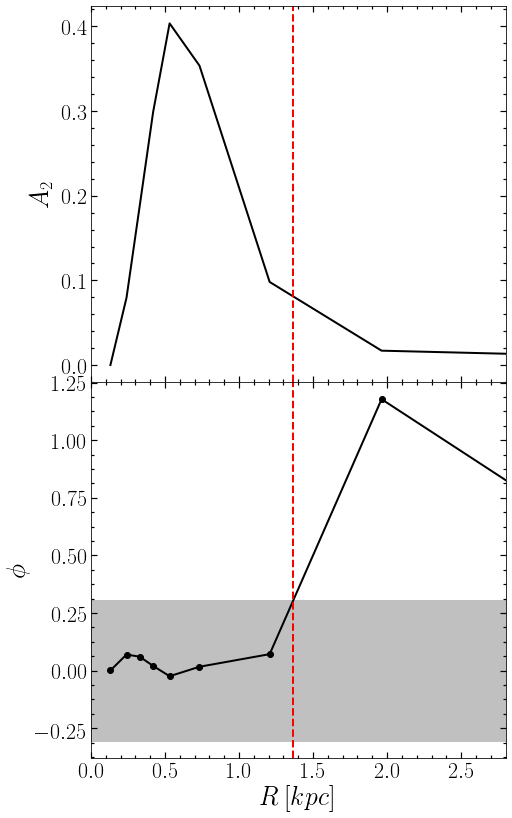

In [28]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,1):#len(snapshot)-1):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value
    vel  = snap['subhalo_001/Str/Velocities'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
#     archivo0 =  open('/home/ornela/python/barras/r50-r90-r200-Mgal_time.dat','a')
#     archivo0.write(str('%03d'% isnap) +'\t'+
#                str('%12.6f'% time) +'\t'+
#                str('%12.6f'% r50) +'\t'+
#                str('%12.6f'% r90) +'\t'+
#                str('%12.6f'% r200) +'\t'+
#                str('%12.6f'% Mgal) +'\n')
#     archivo0.close()
#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
    veloc, = np.where(r < r50)
    
    vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm


#calculo el raux
#     raux = 2*r50
#------------------------------------------------------------------------------------
    dd = range(0,25)+range(38,51)
    ss = range(25,31)+range(32,38)+range(51,len(snapshot)-1)
    if j in dd:
        raux = 2*r50
    elif j in ss:
        raux = r50
    elif j == 31:
        raux = 0.75
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    corte3, = np.where(r<r90)

    A2, phi, rbin = strng.a2(mstr[corte3], xn[corte3], yn[corte3], 10)
    A2max, rmax, phimax = strng.a2max(mstr[corte3], xn[corte3], yn[corte3], 20)

    
# med = mean(phi[1:5])

    phii = phi - phimax

    for i in range(1,len(phii)-2):
        if ((phii[i]<np.arcsin(0.3)) & (phii[i]>-np.arcsin(0.3)) & (phii[i+1]>np.arcsin(0.3))):
            if ((phii[i+2]>np.arcsin(0.3)) | (phii[i+2]<-np.arcsin(0.3))):
                pend = (phii[i+1]-phii[i])/(rbin[i+1]-rbin[i])
                ordenada = phii[i]- pend*rbin[i]
                lbar = (np.arcsin(0.3) - ordenada)/pend
                break
        elif ((phii[i]>-np.arcsin(0.3)) & (phii[i]<np.arcsin(0.3)) & (phii[i+1]<-np.arcsin(0.3))):
            if ((phii[i+2]>np.arcsin(0.3)) | (phii[i+2]<-np.arcsin(0.3))):
                pend = (phii[i+1]-phii[i])/(rbin[i+1]-rbin[i])
                ordenada = phii[i]- pend*rbin[i]
                lbar = (-np.arcsin(0.3) - ordenada)/pend
                break
#     print lbar
    fig=plt.figure(1,figsize=(8,12))
    fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0.03, hspace= 0)
    ax1=fig.add_subplot(211)
    ax1.plot(rbin,A2,'-', lw=2, color='k')
    ax1.set_xlim(0.0,2.8)

    # ax.set_xlim(2,14)
    # ax.set_ylim(0.,0.5)
    # ax.spines['bottom'].set_color('w')
    # ax.spines['top'].set_color('w')
    # ax.spines['left'].set_color('w')
    # ax.spines['right'].set_color('w')
    ax1.set_xticklabels([])
    ax1.minorticks_on()
    ax1.tick_params( labelsize=22) #colors='lightgray')
    ax1.tick_params('both', length=3, width=1.2, which='minor', direction='in', right='on',top='on')#,colors='w')
    ax1.tick_params('both', length=6, width=1.2, which='major', direction='in', right='on',top='on')#,colors='w')  
    ax1.axvline(x=lbar, color='r', lw=2, ls='--')
    # ax.set_facecolor('silver')
    # ax.grid(color='w',linestyle=':',which='major')
    #ax.grid(color='lightgray',linestyle=':',which='minor')
    # ax1.set_xlabel(r'$R$ $[kpc]$', fontsize=26 )#, color='lightgray')
    ax1.set_ylabel(r'$A_{2}$',fontsize=26)#, color='lightgray')

    ax=fig.add_subplot(212)
    ax.fill_between([rbin[0]-0.5,rbin[-1]+0.5],np.arcsin(0.3),-np.arcsin(0.3), color='silver')
    ax.plot(rbin,phii,'ko-', lw=2, color = 'k')
    # ax.set_ylim(0,0.5)
    ax.set_xlim(0,2.8)
    #ax.set_title('subhalo_0'+ str('%s'%vector[i]), fontsize=24)
    # ax.spines['bottom'].set_color('w')
    # ax.spines['top'].set_color('w')
    # ax.spines['left'].set_color('w')
    # ax.spines['right'].set_color('w')
    ax.minorticks_on()
    ax.tick_params( labelsize=22)#, colors='w')
    ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
    ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
    # ax.set_facecolor('silver')
    # ax.grid(color='w',linestyle=':',which='major')
    #ax.grid(color='lightgray',linestyle=':',which='minor')
    ax.set_xlabel(r'$R\:[kpc]$', fontsize=26)#, color='w')
    ax.set_ylabel(r'$\phi$',fontsize=26)#, color='w')
    ax.axvline(x=lbar, color='r', lw=2, ls='--')
    # ax.axhline(y=np.arcsin(0.3), color='r', lw=2, ls='--')
    # ax.axhline(y=-np.arcsin(0.3), color='r', lw=2, ls='--')
    # ax.axvline(x=rmax, color='b', lw=2, ls='--')
    # ax.axhline(y=A2max, color='b', lw=2, ls='--')
    #     plt.text(x = 2, y = 0.43, 
    #              s =r'$R_{max}=$' +str('%.3f'%rmax)+', $A_{2}^{max}=$' + str('%.3f'%A2max),
    #              fontsize = 20, va= 'center', ha= 'left', color = 'k')
    #     plt.annotate('$l_{bar} =$'+ '%.2f'%lbar, xy=(lbar,0), xytext=(0, +80), textcoords='offset points', 
    #                          fontsize=22,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="center")
    fig.savefig('/z/omarioni/barraG1_salida/A2max_time_lines.png', dpi = 100)

    plt.show()

/z/omarioni/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  from ipykernel import kernelapp as app
/z/omarioni/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


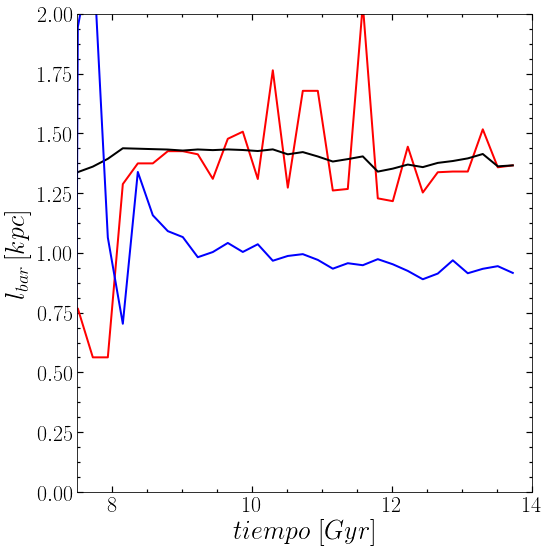

In [2]:
from __future__ import unicode_literals
import pandas

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

cm = np.loadtxt('../barra_G1/lbar_time.dat')
time0 = cm[:,1]
lbar0 = cm[:,2]

cm = np.loadtxt('../barraG1_salida/lbar_time2.dat')
time1 = cm[:,1]
lbar1 = cm[:,2]

lbar_mean1=pandas.rolling_mean(lbar1, 20, min_periods=1)
lbar_mean0=pandas.rolling_mean(lbar0, 20, min_periods=1)

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time1,lbar1,'-', lw=2, color='r')
ax.plot(time1,lbar_mean1,'-', lw=2, color='k')
ax.plot(time0,lbar0,'-', lw=2, color='b')
# ax.plot(time0,lbar_mean0,'--', lw=2, color='k')
ax.set_xlim(7.5,14)
ax.set_ylim(0,2)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
ax.set_ylabel(r'$l_{bar}\:[kpc]$',fontsize=26)#, color='lightgray')
fig.savefig('/z/omarioni/barraG1_salida/lbar_timeM31_lines.png', dpi = 100)
plt.show()

## Cálculo del omega con el elipsoide

In [10]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

cm = np.loadtxt('../barra_G1/lbar_time.dat')
lbar = cm[:,2]

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]
i = 0
for j in range(0,50):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value
    vel  = snap['subhalo_001/Str/Velocities'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
    veloc, = np.where(r < r50)
    
    vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm


#calculo el raux
#     raux = 2*r50
#------------------------------------------------------------------------------------
    dd = range(0,25)+range(38,51)
    ss = range(25,31)+range(32,38)+range(51,len(snapshot)-1)
    if j in dd:
        raux = 2*r50
    elif j in ss:
        raux = r50
    elif j == 31:
        raux = 0.75
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    mask, = np.where( r < raux)
    
    A2max, rmax, phi = strng.a2max(mstr[mask], xn[mask], yn[mask], 20)
    
    phi = phi/2.
    
#Definimos el tamaño de nuestro elipsoide
    aa=lbar[i]
    bb=0.5*lbar[i]
    cc=0.5*lbar[i]
    
#Hacemos la rotación de las coordenadas
    xx = xn*cos(phi)+yn*sin(phi)
    yy = xn*sin(phi)-yn*cos(phi)
    zz = zn
    RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2) # formula del elipsoide
    
    mask, = np.where(RR<1) #seleccionamos las particulas dentro del elipsoide
    
    xn1   = xn[mask]
    yn1   = yn[mask]
    zn1   = zn[mask]
    vxn1  = vxn[mask]
    vyn1  = vyn[mask]
    vzn1  = vzn[mask]
    mstr1 = mstr[mask]
    
    rcil = np.sqrt(xn1**2 + yn1**2)
    
    mask2, = np.where((rcil>0.8*aa) & (rcil<aa)) #tomamos las particulas de la punta del elipsoide

#Calculamos las componentes de momento angular
    Lx = sum((yn1[mask2]*vzn1[mask2] - zn1[mask2]*vyn1[mask2]) * mstr1[mask2])
    Ly = sum((zn1[mask2]*vxn1[mask2] - xn1[mask2]*vzn1[mask2]) * mstr1[mask2])
    Lz = sum((xn1[mask2]*vyn1[mask2] - yn1[mask2]*vxn1[mask2]) * mstr1[mask2])

#Calculamos las componentes del tensor de inercia
    Ixx = sum(mstr1[mask2] * (yn1[mask2]**2 + zn1[mask2]**2))
    Ixy = sum(mstr1[mask2] * xn1[mask2] * yn1[mask2])
    Ixz = sum(mstr1[mask2] * xn1[mask2] * zn1[mask2])
    Iyy = sum(mstr1[mask2] * (xn1[mask2]**2 + zn1[mask2]**2))
    Iyz = sum(mstr1[mask2] * yn1[mask2] * zn1[mask2])
    Izz = sum(mstr1[mask2] * (xn1[mask2]**2 + yn1[mask2]**2))
    
    II = matrix([[Ixx,Ixy,Ixz],[Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]]) #matriz del tensor de inercia
    
    Iinv = II.I #Invertimos la matriz

    omega = Iinv[2,0]*Lx +Iinv[2,1]*Ly + Iinv[2,2]*Lz #velocidad angular del elipsoide
    
#Guargamos los parámetros en distintos archivos
#-------------------------------------------------------------------------------------
#     archivo1 =  open('../barra_G1/omegabar_time.dat','a')
#     archivo1.write(str('%s'% snapshot[j]) +'\t'+
#                str('%12.6f'% time) +'\t'+
#                str('%12.6f'% omega) +'\n')
#     archivo1.close()
#--------------------------------------------------------------------------------------
    i += 1

KeyboardInterrupt: 

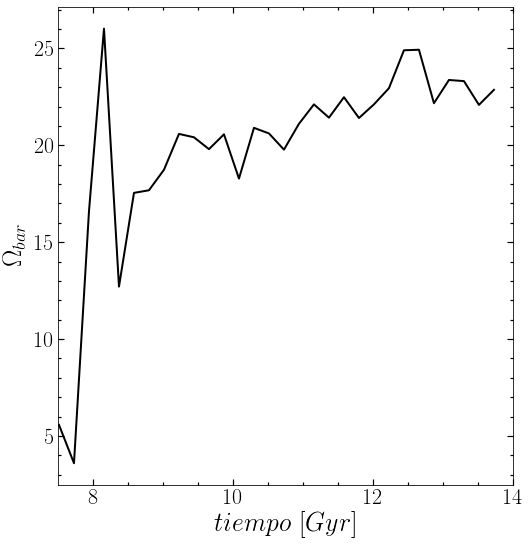

In [33]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

cm1    = np.loadtxt('../barra_G1/omegabar_time.dat')
t1     = cm1[:,1]
omega1 = cm1[:,2]

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(t1,omega1/(2.*pi),'ko-', lw=2)
# ax3.plot(tbar,log10(omega_bar/1.022712086),'go-', lw=2)
#ax3.plot(tt,polyval(p2,tt), 'r-', lw=2)
ax.set_xlim(7.5,14)
#ax3.set_ylim(1.7,2.5)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
ax.set_ylabel(r'$\Omega_{bar}$',fontsize=26)#, color='lightgray')
#ax3.twinx() #me hace un eje del otro lado
#ax3.axis('square') #hace el plot cuadrado
#ax3.set_axisbelow(True)
fig.savefig('/z/omarioni/barraG1_salida/omegabar_time.png', dpi = 100)
plt.show()


## Momento angular vs tiempo 

In [53]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

cm = np.loadtxt('../barra_G1/lbar_time.dat')
lbar = cm[:,2]

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,50):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr  = snap['subhalo_001/Str/Coordinates'].value
    mstr  = snap['subhalo_001/Str/Masses'].value
    vstr  = snap['subhalo_001/Str/Velocities'].value
    
    pdrk = snap['subhalo_001/Drk/Coordinates'].value
    mdrk = snap['subhalo_001/Drk/Masses'].value
    vdrk  = snap['subhalo_001/Drk/Velocities'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
    
    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
    
    vstr_x = vstr[:,0] 
    vstr_y = vstr[:,1] 
    vstr_z = vstr[:,2] 
    
    vdrk_x = vdrk[:,0] 
    vdrk_y = vdrk[:,1] 
    vdrk_z = vdrk[:,2]
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(rstr<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(rstr[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(rstr[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
    veloc, = np.where(rstr < r50)
    
    vstr_xcm = sum(mstr[veloc]*vstr_x[veloc])/sum(mstr[veloc])
    vstr_ycm = sum(mstr[veloc]*vstr_y[veloc])/sum(mstr[veloc])
    vstr_zcm = sum(mstr[veloc]*vstr_z[veloc])/sum(mstr[veloc])
    
    veloc2, = np.where(rdrk < r50)
    
    vdrk_xcm = sum(mdrk[veloc2]*vdrk_x[veloc2])/sum(mdrk[veloc2])
    vdrk_ycm = sum(mdrk[veloc2]*vdrk_y[veloc2])/sum(mdrk[veloc2])
    vdrk_zcm = sum(mdrk[veloc2]*vdrk_z[veloc2])/sum(mdrk[veloc2])
    
#velocidades de las estrellas respecto del centro de masa de la galaxia
    vstrx = vstr_x - vstr_xcm
    vstry = vstr_y - vstr_ycm
    vstrz = vstr_z - vstr_zcm
    
    vdrkx = vdrk_x - vdrk_xcm
    vdrky = vdrk_y - vdrk_ycm
    vdrkz = vdrk_z - vdrk_zcm
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vstrx,vstry,vstrz,2*r50)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr
    vxn_str = e1x*vstrx + e1y*vstry + e1z*vstrz
    vyn_str = e2x*vstrx + e2y*vstry + e2z*vstrz
    vzn_str = e3x*vstrx + e3y*vstry + e3z*vstrz
    
    xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
    yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
    zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk
    vxn_drk = e1x*vdrkx + e1y*vdrky + e1z*vdrkz
    vyn_drk = e2x*vdrkx + e2y*vdrky + e2z*vdrkz
    vzn_drk = e3x*vdrkx + e3y*vdrky + e3z*vdrkz
    
#-------------------------------------------------------------------------------------- 
    lim_str, = np.where (rstr < 2)
    lim_drk, = np.where (rdrk < 2)

#Calculamos las componentes de momento angular
    Lx_str = sum((yn_str[lim_str]*vzn_str[lim_str] - zn_str[lim_str]*vyn_str[lim_str])* mstr[lim_str])
    Ly_str = sum((zn_str[lim_str]*vxn_str[lim_str] - xn_str[lim_str]*vzn_str[lim_str])* mstr[lim_str])
    Lz_str = sum((xn_str[lim_str]*vyn_str[lim_str] - yn_str[lim_str]*vxn_str[lim_str])* mstr[lim_str])
    
    Lx_str = Lx_str/sum(mstr[lim_str])
    Ly_str = Ly_str/sum(mstr[lim_str])
    Lz_str = Lz_str/sum(mstr[lim_str])
    
    Lx_drk = sum((yn_drk[lim_drk]*vzn_drk[lim_drk] - zn_drk[lim_drk]*vyn_drk[lim_drk])* mdrk[lim_drk])
    Ly_drk = sum((zn_drk[lim_drk]*vxn_drk[lim_drk] - xn_drk[lim_drk]*vzn_drk[lim_drk])* mdrk[lim_drk])
    Lz_drk = sum((xn_drk[lim_drk]*vyn_drk[lim_drk] - yn_drk[lim_drk]*vxn_drk[lim_drk])* mdrk[lim_drk])
    
    Lx_drk = Lx_drk/sum(mdrk[lim_drk])
    Ly_drk = Ly_drk/sum(mdrk[lim_drk])
    Lz_drk = Lz_drk/sum(mdrk[lim_drk])
    

#Guargamos los parámetros en distintos archivos
#-------------------------------------------------------------------------------------
    archivo1 =  open('../barra_G1/Lstr_time.dat','a')
    archivo1.write(str('%s'% snapshot[j]) +'\t'+
                str('%12.6f'% time) +'\t'+
                str('%12.6f'% Lx_str) +'\t'+
                str('%12.6f'% Ly_str) +'\t'+
                str('%12.6f'% Lz_str) +'\n')
    archivo1.close()
    
    archivo2 =  open('../barra_G1/Ldrk_time.dat','a')
    archivo2.write(str('%s'% snapshot[j]) +'\t'+
                str('%12.6f'% time) +'\t'+
                str('%12.6f'% Lx_drk) +'\t'+
                str('%12.6f'% Ly_drk) +'\t'+
                str('%12.6f'% Lz_drk) +'\n')
    archivo2.close() 
#--------------------------------------------------------------------------------------


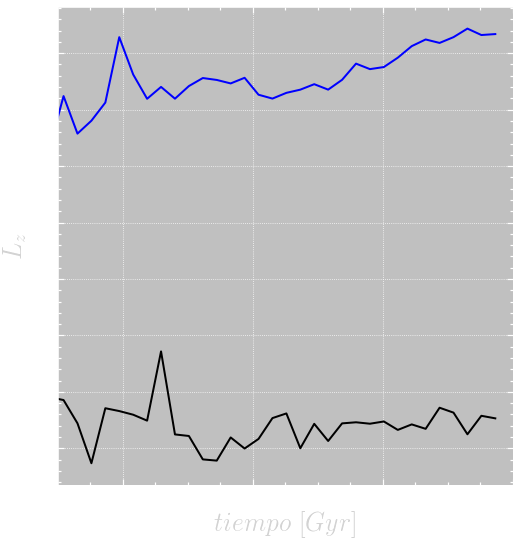

In [54]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

cm0 = np.loadtxt('../barra_G1/Lstr_time.dat')
time0  = cm0[:,1]
Lx_str = cm0[:,2]
Ly_str = cm0[:,3]
Lz_str = cm0[:,4]

cm1 = np.loadtxt('../barra_G1/Ldrk_time.dat')
time1  = cm1[:,1]
Lx_drk = cm1[:,2]
Ly_drk = cm1[:,3]
Lz_drk = cm1[:,4]


fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time0,Lz_str,'-', lw=2, color='b')
# ax.plot(time0,Lx_str,'--', lw=2, color='b')
# ax.plot(time0,Ly_str,':', lw=2, color='b')
ax.plot(time1,Lz_drk,'-', lw=2, color='k')
# ax.plot(time1,Lx_drk,'--', lw=2, color='k')
# ax.plot(time1,Ly_drk,':', lw=2, color='k')
ax.set_xlim(7,14)
#ax.set_ylim(0,0.2e7)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
ax.set_facecolor('silver')
ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26, color='lightgray')
ax.set_ylabel(r'$L_{z}$',fontsize=26, color='lightgray')
plt.show()

## Rcorot vs tiempo

In [15]:
import h5py
import rotation as rot
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

cm1   = np.loadtxt('../barra_G1/omegabar_time.dat') #tiene corregido el phi (phi=phi/2)
ombar = cm1[:,2]
ombar = ombar/(2.*pi)

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,50):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value
    vel  = snap['subhalo_001/Str/Velocities'].value

    pgas = snap['subhalo_001/Gas/Coordinates'].value
    mgas = snap['subhalo_001/Gas/Masses'].value

    pdrk = snap['subhalo_001/Drk/Coordinates'].value
    mdrk = snap['subhalo_001/Drk/Masses'].value
              
#paso las coordenadas respecto al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2]) 
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
        
    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2 + ygas**2 + zgas**2)
        
    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
     
#--------------------------------------------------------------------
    rgal = 0.15*r200 #defino el radio de la galaxia

    limit = np.where(rstr < rgal)      #hago un límite de los r dentro de rgal
    r_sort = np.sort(rstr[limit])      #acomodo los r de menor a mayor
    r_indice = np.argsort(rstr[limit]) #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice]) #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1] #masa total de la galaxia

    #Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa

#-----------------------------------------------------------------------

#Cálculo de la velocidad circular
    
    rtot = concatenate([rstr,rgas,rdrk])
    mtot = concatenate([mstr, mgas, mdrk])

    limit_tot   = np.where(rtot < r200)
    rtot_sort   = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = cumsum(mtot[limit_tot][rtot_indice])
        
    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    
#     Vvir = Vtot[-1]
    omega = Vtot/(rtot_sort*2.*pi)
    
#--------------------------------------------------------------
#Interpolamos para calcular el radio de corotación

    for kk,_ in enumerate(rtot_sort):
        if omega[kk] < ombar[j]:
            break
            
    pend = (omega[kk] - omega[kk-1]) / (rtot_sort[kk] - rtot_sort[kk-1])
    y0 = (omega[kk-1]*rtot_sort[kk] - omega[kk]*rtot_sort[kk-1]) / (rtot_sort[kk] - rtot_sort[kk-1])
    
    r_corot = (ombar[j]- y0)/ pend #calculado con el elipsoide

#     #print rtot_sort
#     print 'vel_elip=', ombar[j]
    
#     print 'r_corot =', r_corot, '#calculado con la veloc del elipsoide'

#Guargamos los parámetros en distintos archivos
#-------------------------------------------------------------------------------------
    archivo1 =  open('../barra_G1/rcorot_elip_time.dat','a') 
    archivo1.write(str('%s'% snapshot[j]) +'\t'+
               str('%12.6f'% time) +'\t'+
               str('%12.6f'% r_corot) +'\n')
    archivo1.close()
#--------------------------------------------------------------------------------------

#test
#--------------------------------------------------------------------------------------
#     fig = plt.figure(1,figsize=(8,8))
#     fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)    
#     ax1=fig.add_subplot(111)
#     ax1.plot(rtot_sort,omega,'ko-', lw=2)
#     ax1.set_ylim(0,50)
#     ax1.set_xlim(-1,10)
#     ax1.spines['bottom'].set_color('w')
#     ax1.spines['top'].set_color('w')
#     ax1.spines['left'].set_color('w')
#     ax1.spines['right'].set_color('w')
#     ax1.minorticks_on()
#     ax1.tick_params( labelsize=22, colors='lightgray')
#     ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
#     ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
#     ax1.set_facecolor('silver')
#     ax1.grid(color='w',linestyle=':',which='major')
#     #ax1.grid(color='lightgray',linestyle=':',which='minor')
#     ax1.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26, color='lightgray')
#     ax1.set_ylabel(r'$R_{corot}$',fontsize=26, color='lightgray')
#     ax1.axvline(x=r_corot, color='b', lw=2, ls='--')
#     ax1.axhline(y=ombar[j], color='b', lw=2, ls='--')



/home/omarioni/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in divide


IndexError: index 30 is out of bounds for axis 0 with size 30

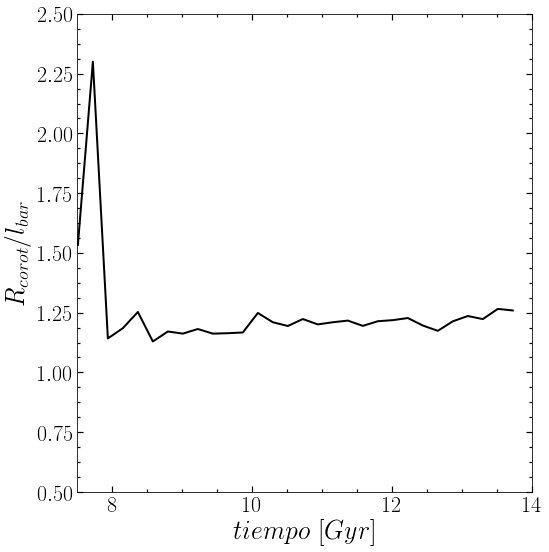

In [28]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

cm1       = np.loadtxt('../barra_G1/rcorot_elip_time.dat')
time1     = cm1[:,1]
rcor_elip = cm1[:,2]

cm2   = np.loadtxt('../barra_G1/lbar_time.dat')
time2 = cm2[:,1]
lbar  = cm2[:,2]

cm4   = np.loadtxt('../barra_G1/omegabar_time.dat')
time4 = cm4[:,1]
ombar = cm4[:,2]
ombar = ombar/(2.*pi)


fig = plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)

# ax0=fig.add_subplot(221)
# ax0.plot(time2,lbar,'k-', lw=2)
# ax0.set_ylim(0.,2)
# ax0.set_xlim(7.5,14)
# # ax0.spines['bottom'].set_color('w')
# # ax0.spines['top'].set_color('w')
# # ax0.spines['left'].set_color('w')
# # ax0.spines['right'].set_color('w')
# ax0.minorticks_on()
# ax0.tick_params( labelsize=22)#, colors='lightgray')
# ax0.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
# ax0.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# # ax0.set_facecolor('silver')
# # ax0.grid(color='w',linestyle=':',which='major')
# #ax0.grid(color='lightgray',linestyle=':',which='minor')
# ax0.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
# ax0.set_ylabel(r'$l_{bar}$',fontsize=26)#, color='lightgray')



# ax1=fig.add_subplot(111)
# ax1.plot(time1,rcor_elip,'k-', lw=2)
# ax1.set_ylim(0,3)
# ax1.set_xlim(7.5,14)
# # ax1.spines['bottom'].set_color('w')
# # ax1.spines['top'].set_color('w')
# # ax1.spines['left'].set_color('w')
# # ax1.spines['right'].set_color('w')
# ax1.minorticks_on()
# ax1.tick_params( labelsize=22)#, colors='lightgray')
# ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
# ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# # ax1.set_facecolor('silver')
# # ax1.grid(color='w',linestyle=':',which='major')
# #ax1.grid(color='lightgray',linestyle=':',which='minor')
# ax1.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
# ax1.set_ylabel(r'$R_{corot}$',fontsize=26)#, color='lightgray')
# fig.savefig('/z/omarioni/barraG1_salida/Rcorot_time.png', dpi = 100)

ax2=fig.add_subplot(111)
ax2.plot(time1,rcor_elip/lbar[:len(rcor_elip)],'k-', lw=2)
ax2.set_ylim(0.5,2.5)
ax2.set_xlim(7.5,14)
# ax2.spines['bottom'].set_color('w')
# ax2.spines['top'].set_color('w')
# ax2.spines['left'].set_color('w')
# ax2.spines['right'].set_color('w')
ax2.minorticks_on()
ax2.tick_params( labelsize=22)#, colors='lightgray')
ax2.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax2.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax2.set_facecolor('silver')
# ax2.grid(color='w',linestyle=':',which='major')
#ax2.grid(color='lightgray',linestyle=':',which='minor')
ax2.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
ax2.set_ylabel(r'$R_{corot}/l_{bar}$',fontsize=26)#, color='lightgray')
fig.savefig('/z/omarioni/barraG1_salida/Rcorot_lbar_time.png', dpi = 100)

# ax3=fig.add_subplot(224)
# ax3.plot(time4, log10(ombar), 'ko-', lw=2)
# #ax3.set_ylim(0.96,1.01)
# ax3.set_xlim(7.5,14)
# # ax3.spines['bottom'].set_color('w')
# # ax3.spines['top'].set_color('w')
# # ax3.spines['left'].set_color('w')
# # ax3.spines['right'].set_color('w')
# ax3.minorticks_on()
# ax3.tick_params( labelsize=22)#, colors='lightgray')
# ax3.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
# ax3.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# # ax3.set_facecolor('silver')
# # ax3.grid(color='w',linestyle=':',which='major')
# #ax3.grid(color='lightgray',linestyle=':',which='minor')
# ax3.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
# ax3.set_ylabel(r'$log(\Omega_{bar})$',fontsize=26)#, color='lightgray')

plt.show()

## Contracción de la masa de materia oscura

In [18]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,50):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pdrk = snap['subhalo_001/Drk/Coordinates'].value
    mdrk = snap['subhalo_001/Drk/Masses'].value
    

#paso las coordenadas respecto al centro de la galaxia
    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#------------------------------------------------
    limit1 = np.where(r < 0.5)
    r_ind1 = np.argsort(r[limit1])
    
    limit2 = np.where(r < 1.0)
    r_ind2 = np.argsort(r[limit2])
    
    limit3 = np.where(r < 1.5)
    r_ind3 = np.argsort(r[limit3])

    Mc_05 = cumsum(mdrk[limit1][r_ind1])
    Mdrk_05 = Mc_05[-1]
    
    Mc_10 = cumsum(mdrk[limit2][r_ind2])
    Mdrk_10 = Mc_10[-1]
    
    Mc_15 = cumsum(mdrk[limit3][r_ind3])
    Mdrk_15 = Mc_15[-1]
    
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    archivo1 =  open('../barra_G1/Mdrk_time.dat','a')
    archivo1.write(str('%s'%snapshot[j]) +'\t'+
            str('%12.6f'% time) +'\t'+
            str('%12.6f'% np.log10(Mdrk_05)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_10)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_15)) +'\n')
    archivo1.close()
#------------------------------------------------------------------------------------

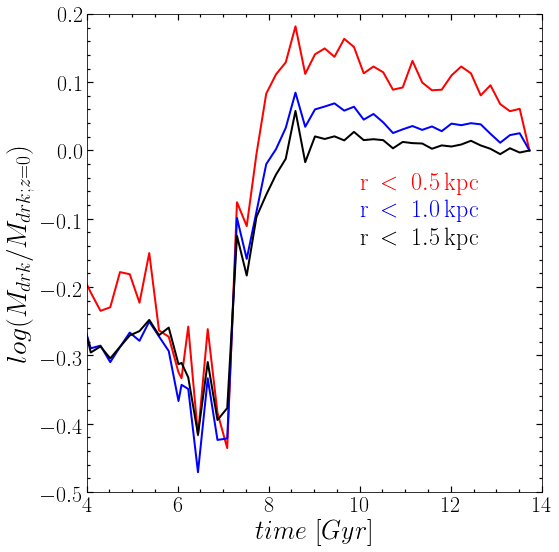

In [2]:
from __future__ import unicode_literals
from scipy import interpolate

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


cm = np.loadtxt('../barra_G1/Mdrk_time.dat')

time    = cm[:,1]
Mdrk_05 = cm[:,2]
Mdrk_10 = cm[:,3]
Mdrk_15 = cm[:,4]

fig = plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,Mdrk_05-Mdrk_05[0],'r-', lw=2)
ax.plot(time,Mdrk_10-Mdrk_10[0],'b-', lw=2)
ax.plot(time,Mdrk_15-Mdrk_15[0],'k-', lw=2)
ax.set_ylim(-0.5,0.2)
ax.set_xlim(4,14)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$time$ $[Gyr]$', fontsize=26)#, color='lightgray')
ax.set_ylabel(r'$log(M_{drk}/M_{drk;z=0})$',fontsize=28)#, color='lightgray')
plt.text(x = 10, y = -0.05, s =r'$\mathrm{r\:<\:0.5\:kpc}$',
         fontsize = 24, va= 'center', ha= 'left', color = 'r')
plt.text(x = 10, y = -0.09, s =r'$\mathrm{r\:<\:1.0\:kpc}$',
         fontsize = 24, va= 'center', ha= 'left', color = 'b')
plt.text(x = 10, y = -0.13, s =r'$\mathrm{r\:<\:1.5\:kpc}$',
         fontsize = 24, va= 'center', ha= 'left', color = 'k')
fig.savefig('/z/omarioni/barraG1_salida/contraccionMasa_time.png', dpi = 100)

plt.show()

## Test de veloc tangencial 

In [6]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

cm = np.loadtxt('../barra_G1/lbar_time.dat')
lbar = cm[:,2]

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,1):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr  = snap['subhalo_001/Str/Coordinates'].value
    mstr  = snap['subhalo_001/Str/Masses'].value
    vstr  = snap['subhalo_001/Str/Velocities'].value
    
    pdrk = snap['subhalo_001/Drk/Coordinates'].value
    mdrk = snap['subhalo_001/Drk/Masses'].value
    vdrk  = snap['subhalo_001/Drk/Velocities'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
    
    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
    
    vstr_x = vstr[:,0] 
    vstr_y = vstr[:,1] 
    vstr_z = vstr[:,2] 
    
    vdrk_x = vdrk[:,0] 
    vdrk_y = vdrk[:,1] 
    vdrk_z = vdrk[:,2]
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(rstr<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(rstr[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(rstr[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
    veloc, = np.where(rstr < r50)
    
    vstr_xcm = sum(mstr[veloc]*vstr_x[veloc])/sum(mstr[veloc])
    vstr_ycm = sum(mstr[veloc]*vstr_y[veloc])/sum(mstr[veloc])
    vstr_zcm = sum(mstr[veloc]*vstr_z[veloc])/sum(mstr[veloc])
    
#     veloc2, = np.where(rdrk < r50)
    
#     vdrk_xcm = sum(mdrk[veloc2]*vdrk_x[veloc2])/sum(mdrk[veloc2])
#     vdrk_ycm = sum(mdrk[veloc2]*vdrk_y[veloc2])/sum(mdrk[veloc2])
#     vdrk_zcm = sum(mdrk[veloc2]*vdrk_z[veloc2])/sum(mdrk[veloc2])
    
#velocidades de las estrellas respecto del centro de masa de la galaxia
    vstrx = vstr_x - vstr_xcm
    vstry = vstr_y - vstr_ycm
    vstrz = vstr_z - vstr_zcm
    
#     vdrkx = vdrk_x - vdrk_xcm
#     vdrky = vdrk_y - vdrk_ycm
#     vdrkz = vdrk_z - vdrk_zcm
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vstrx,vstry,vstrz,2*r50)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr
    vxn_str = e1x*vstrx + e1y*vstry + e1z*vstrz
    vyn_str = e2x*vstrx + e2y*vstry + e2z*vstrz
    vzn_str = e3x*vstrx + e3y*vstry + e3z*vstrz
    
#     xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
#     yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
#     zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk
#     vxn_drk = e1x*vdrkx + e1y*vdrky + e1z*vdrkz
#     vyn_drk = e2x*vdrkx + e2y*vdrky + e2z*vdrkz
#     vzn_drk = e3x*vdrkx + e3y*vdrky + e3z*vdrkz
    
#-------------------------------------------------------------------------------------- 
    lim_str, = np.where ( (rstr < 2) & (rstr > 1.8) )
#     lim_drk, = np.where (rdrk < 2)

#Calculamos las componentes de momento angular
    Lx_str = sum((yn_str[lim_str]*vzn_str[lim_str] - zn_str[lim_str]*vyn_str[lim_str])* mstr[lim_str])
    Ly_str = sum((zn_str[lim_str]*vxn_str[lim_str] - xn_str[lim_str]*vzn_str[lim_str])* mstr[lim_str])
    Lz_str = sum((xn_str[lim_str]*vyn_str[lim_str] - yn_str[lim_str]*vxn_str[lim_str])* mstr[lim_str])
    
    Lx_str = Lx_str/sum(mstr[lim_str])
    Ly_str = Ly_str/sum(mstr[lim_str])
    Lz_str = Lz_str/sum(mstr[lim_str])
    
#     Lx_drk = sum((yn_drk[lim_drk]*vzn_drk[lim_drk] - zn_drk[lim_drk]*vyn_drk[lim_drk])* mdrk[lim_drk])
#     Ly_drk = sum((zn_drk[lim_drk]*vxn_drk[lim_drk] - xn_drk[lim_drk]*vzn_drk[lim_drk])* mdrk[lim_drk])
#     Lz_drk = sum((xn_drk[lim_drk]*vyn_drk[lim_drk] - yn_drk[lim_drk]*vxn_drk[lim_drk])* mdrk[lim_drk])
    
#     Lx_drk = Lx_drk/sum(mdrk[lim_drk])
#     Ly_drk = Ly_drk/sum(mdrk[lim_drk])
#     Lz_drk = Lz_drk/sum(mdrk[lim_drk])
    
    Rcirc = np.sqrt(xn_str[lim_str]**2 + yn_str[lim_str]**2)
   
    VT = sum((xn_str[lim_str]*vyn_str[lim_str] - yn_str[lim_str]*vxn_str[lim_str])/Rcirc)/len(xn_str[lim_str])
    
    print 'Rcirc =', median(Rcirc)
    print 'VT =', VT
    print 'Lz_str =', Lz_str

Rcirc = 1.80344
VT = 60.5206015299
Lz_str = 113.343


## test limit

0224 3.01737112503 0.136907631912 0.635784327984 69.6326516161


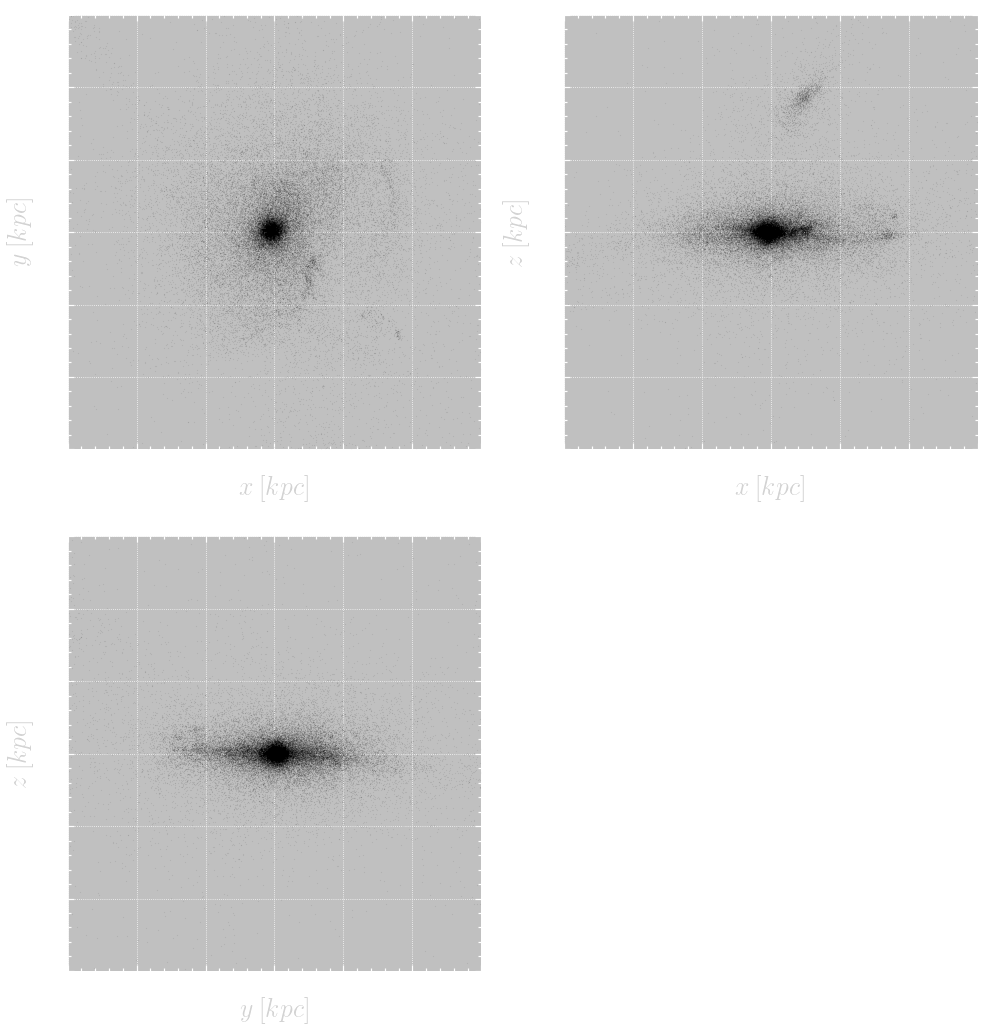

0208 2.80312723714 0.112191019141 0.538600802422 50.3621496873


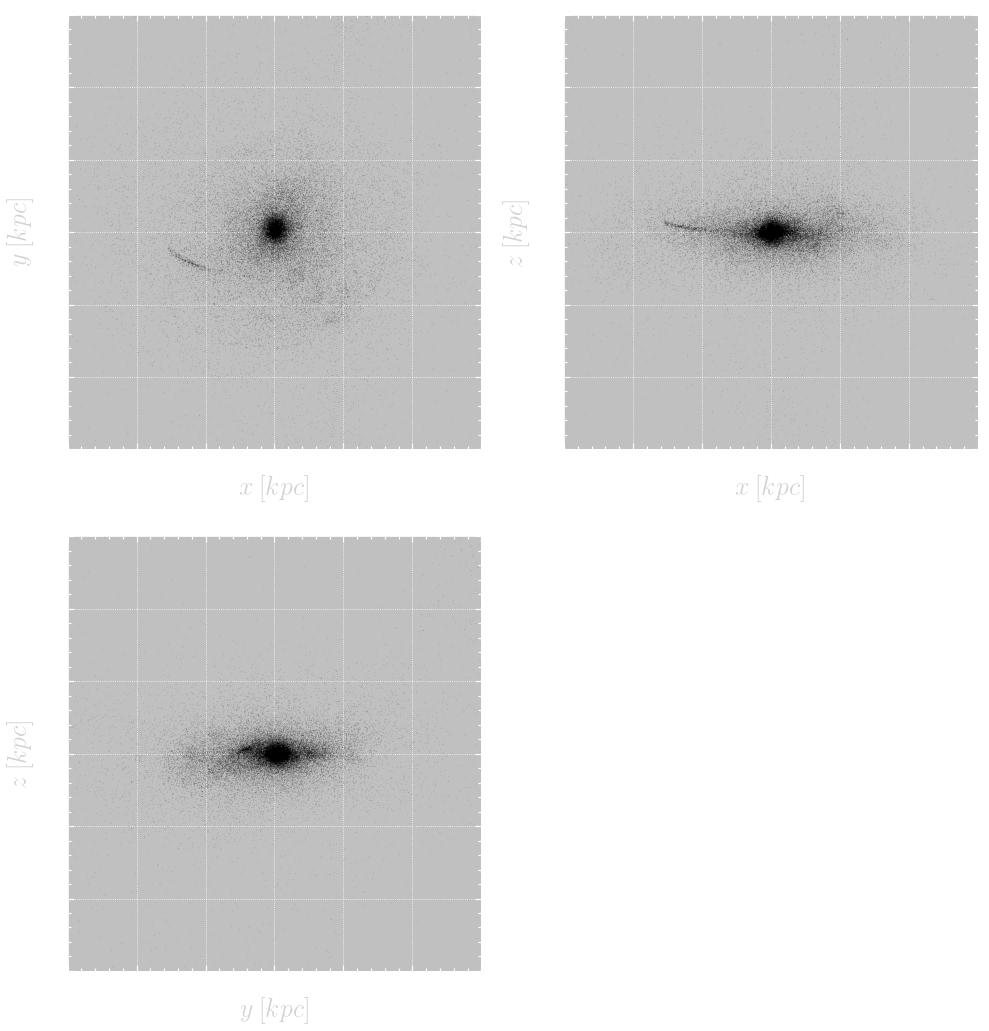

0192 2.58888334925 0.440433418571 0.624569714069 179.057019404


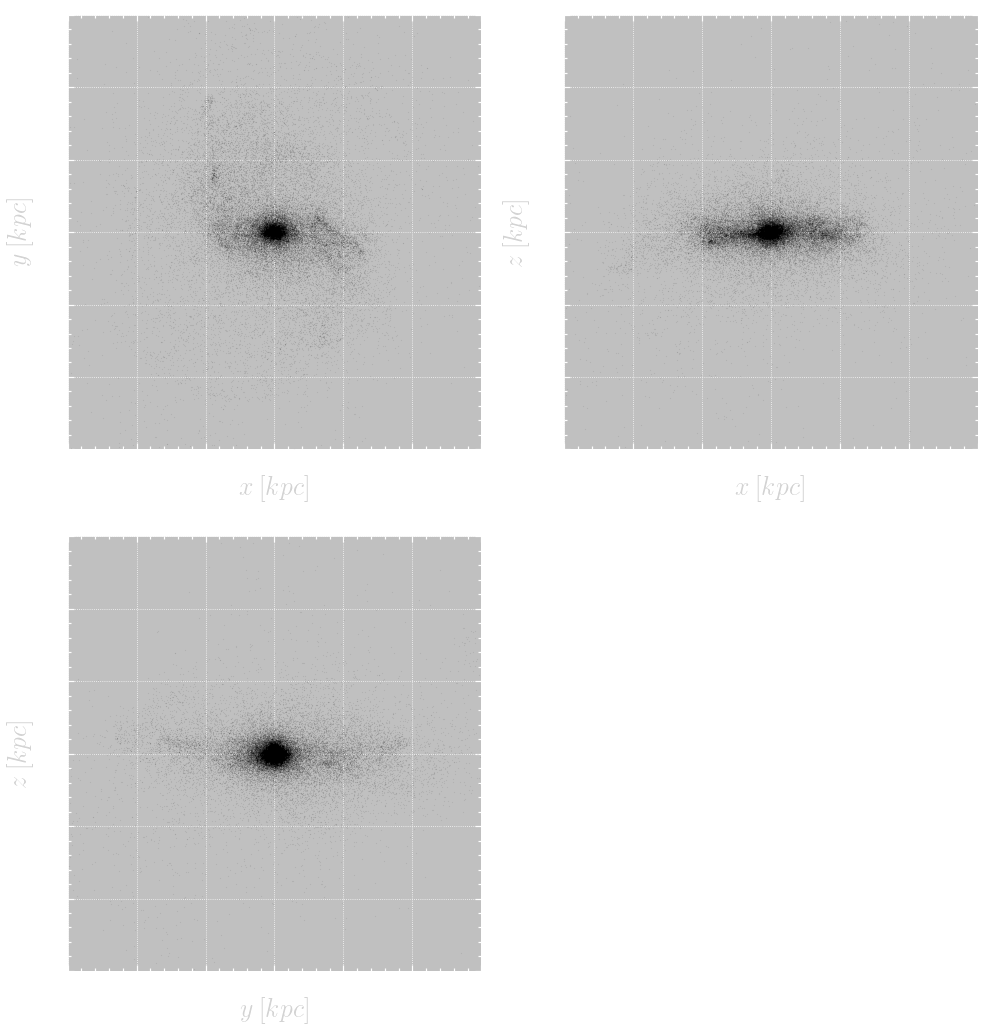

0176 2.37463946136 0.186112262878 0.513882160187 113.21405024


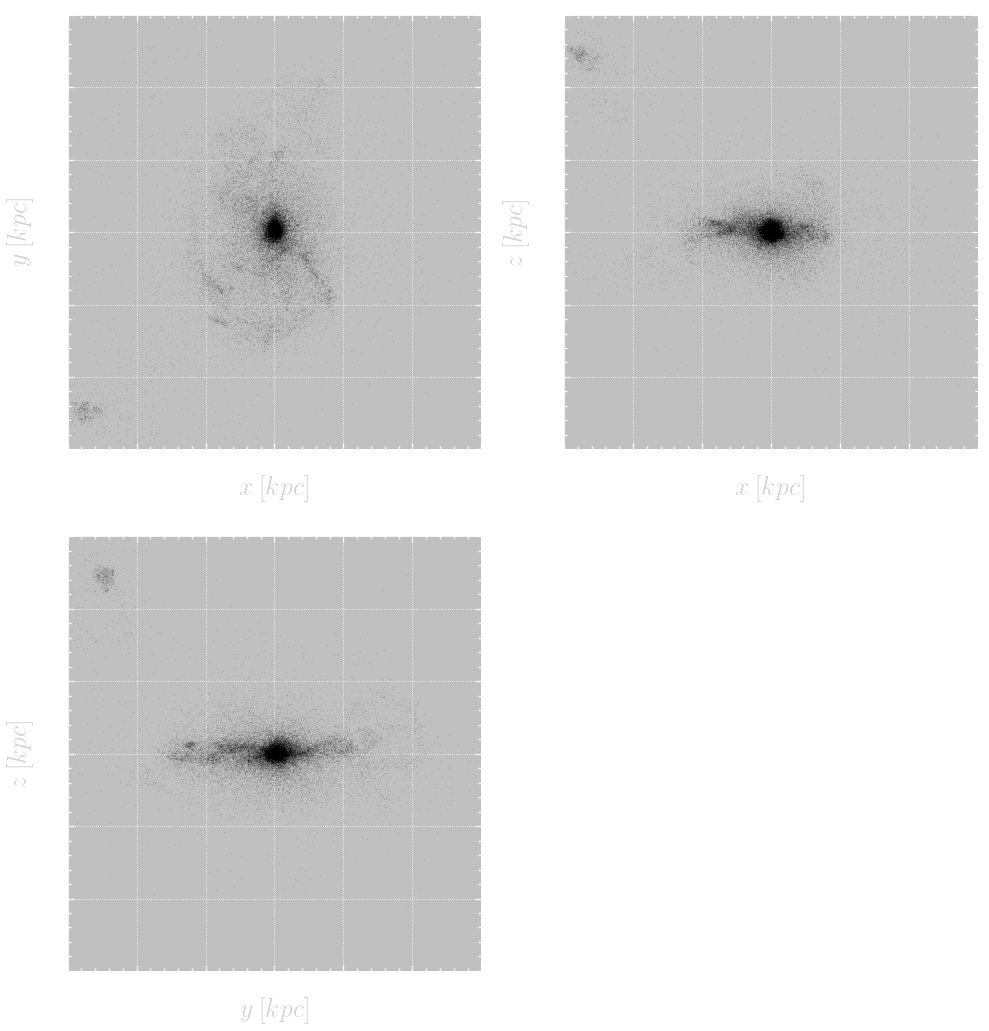

0160 2.16039557346 0.216581601911 0.252758234739 153.081424274


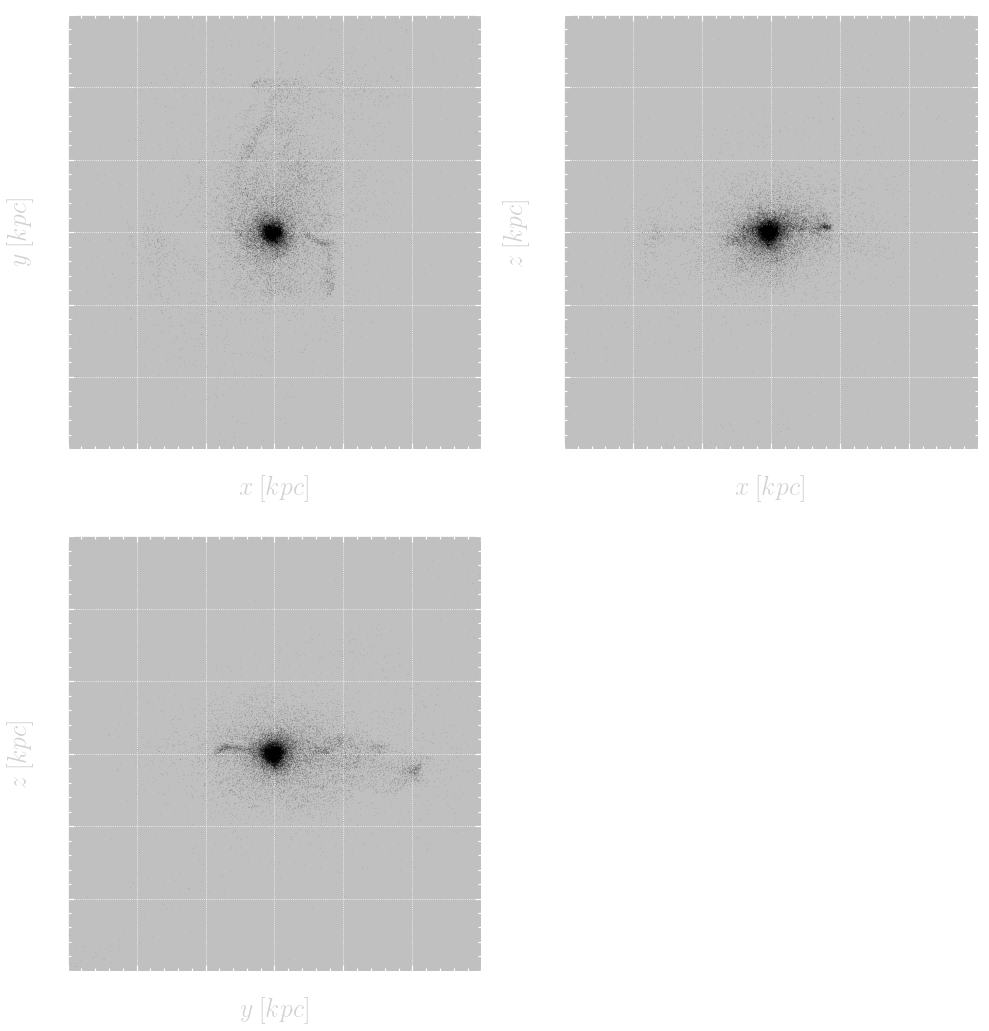

0144 1.94615168556 0.221999535878 0.308114826679 84.1790901353


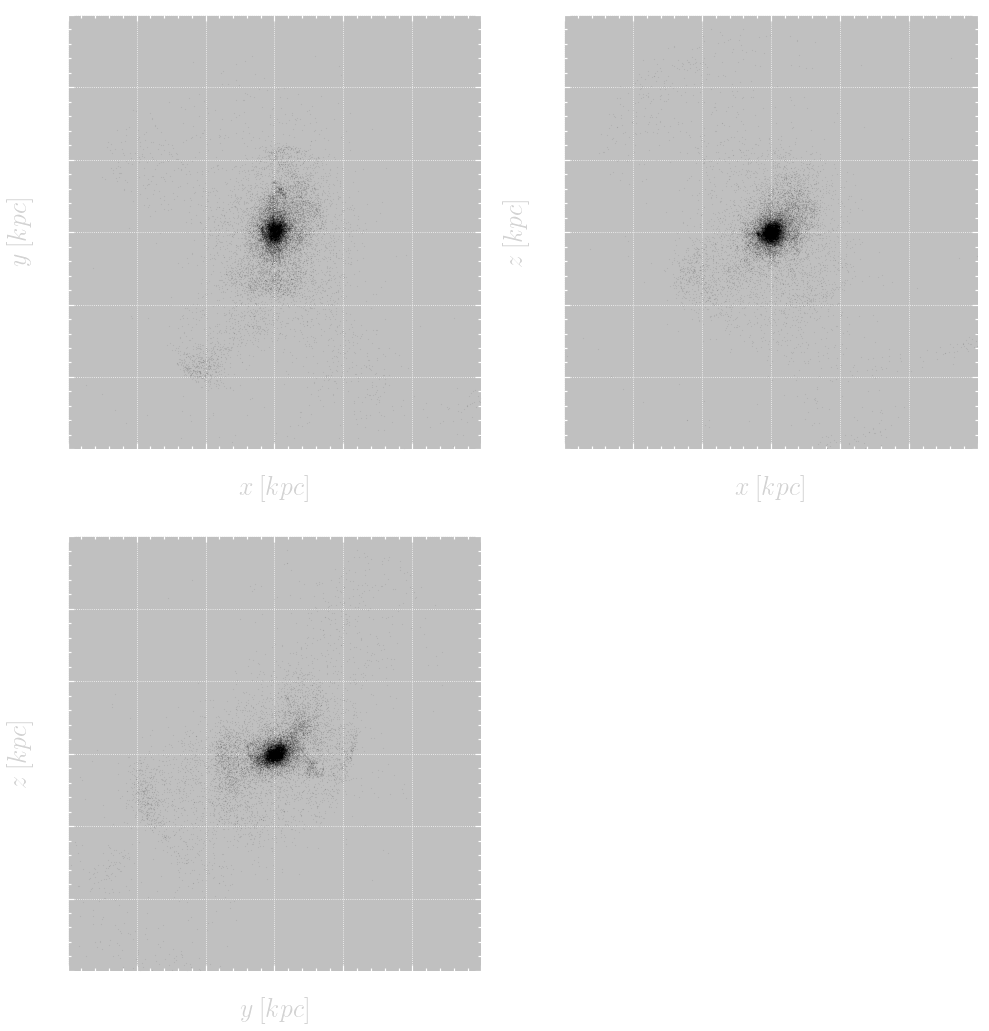

0128 1.73190779767 0.377730161061 0.213664531708 142.732246922


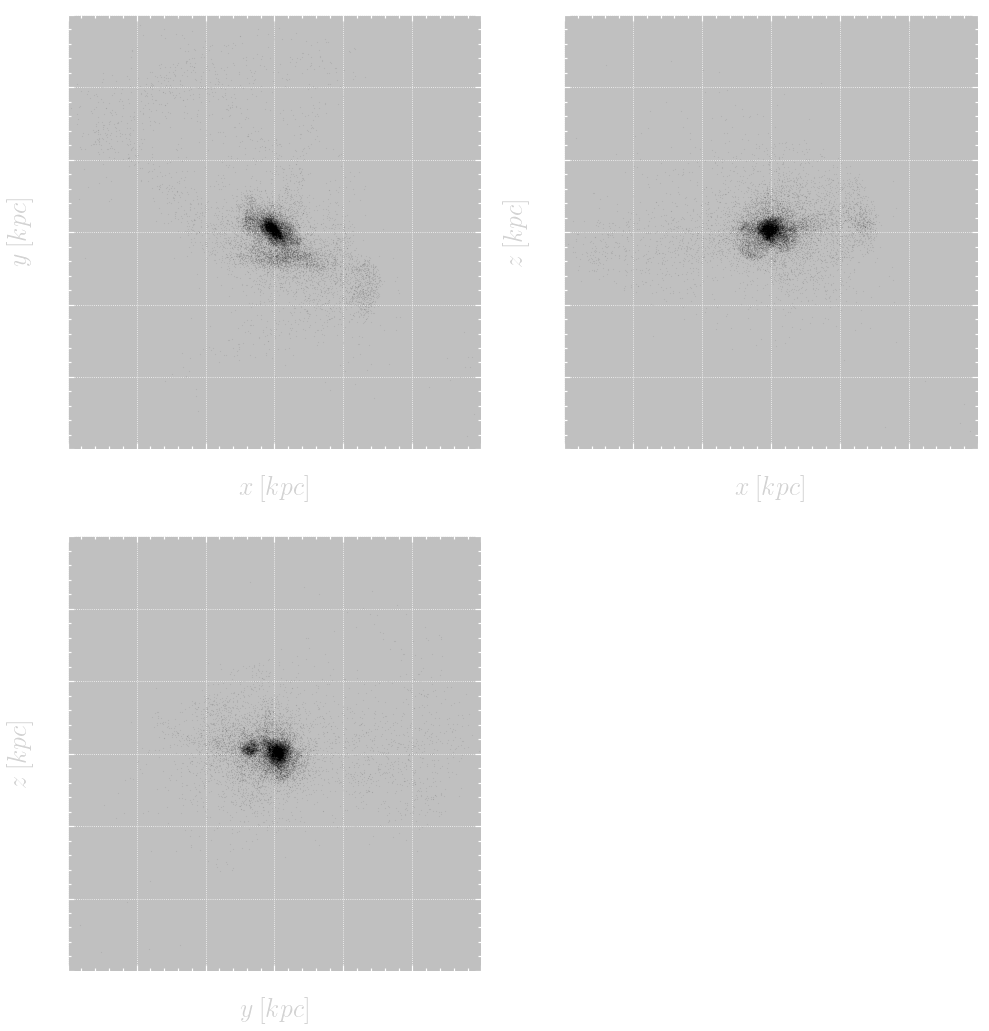

0112 1.51766390977 0.162805342177 0.217738255858 125.512871942


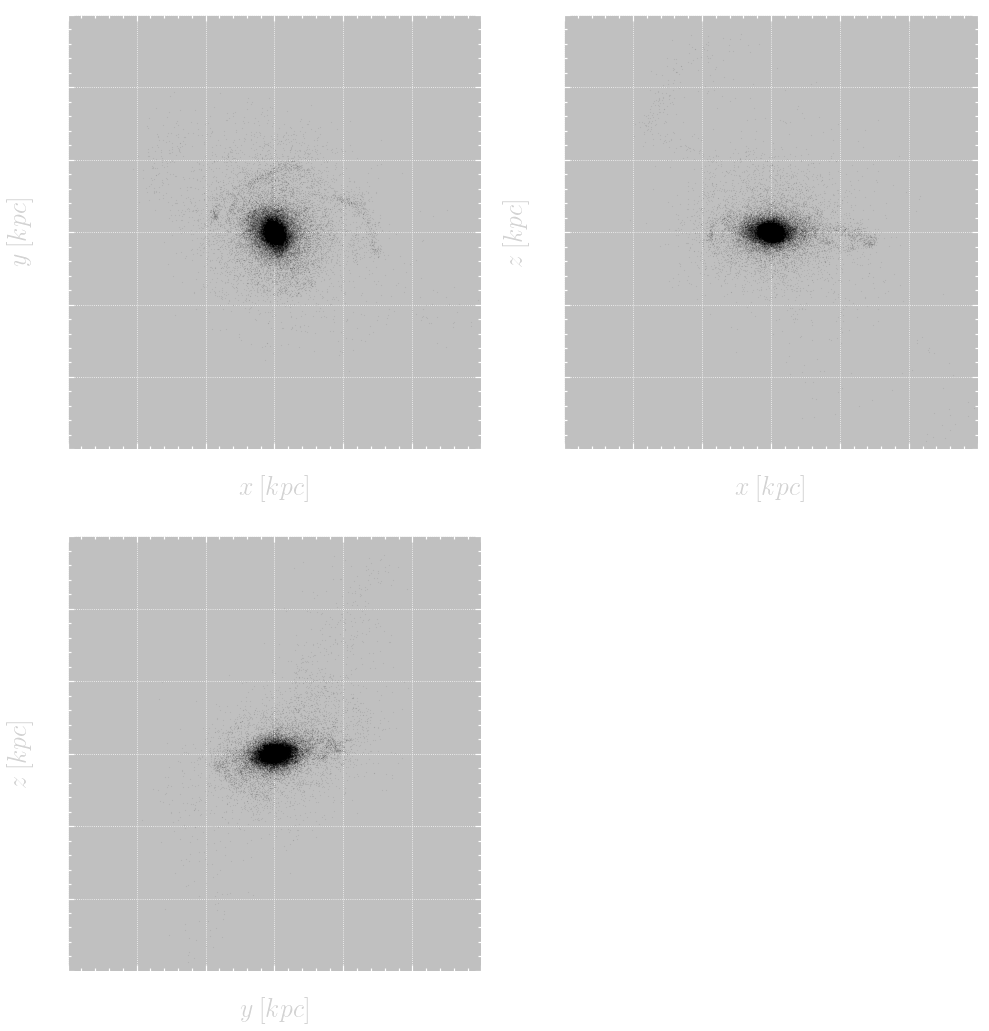

In [30]:
import h5py
import rotation as rot
import barstrength as strng
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

G = 4.299e-6
a0=1.

snapshot = np.loadtxt('../snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(51,len(snapshot)-1):
    
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value

    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value
    vel  = snap['subhalo_001/Str/Velocities'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa

#componentes de la velocidad del centro de masa
    veloc, = np.where(r < r50)
    
    vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm


#calculo el raux
    raux = r50
#------------------------------------------------------------------------------------
#     dd = range(0,25)+range(38,len(snapshot)-1)
#     ss = range(25,31)+range(32,38)+range(51,len(snapshot)-1)
#     if j in dd:
#         raux = 2*r50
#     elif j in ss:
#         raux = r50
#     elif j == 31:
#         raux = 0.75
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    mask, = np.where( r < raux)
    
    A2max, rmax, phi = strng.a2max(mstr[mask], xn[mask], yn[mask], 20)
    
    #print A2max
    
    phi = phi*180./pi

    if phi < 0:
        phi2= phi+360
    else: 
        phi2= phi
        
    phi2 = phi2/2.
    
    print snapshot[j], time, A2max,rmax, phi2

    mask,= np.where(r<5)

    fig=plt.figure(1,figsize=(16,16))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax1=fig.add_subplot(221)
    ax1.plot(xn[mask],yn[mask],'.', markersize=0.05, color='k')
    #ax1.plot(xn[mask],yn[mask],'.', markersize=0.5, color='r')
    #ax1.plot(xn[mask2],yn[mask2],'.', markersize=0.5, color='b')
    ax1.set_xlim(-3,3)
    ax1.set_ylim(-3,3)
    ax1.spines['bottom'].set_color('w')
    ax1.spines['top'].set_color('w')
    ax1.spines['left'].set_color('w')
    ax1.spines['right'].set_color('w')
    ax1.minorticks_on()
    ax1.tick_params( labelsize=22, colors='lightgray')
    ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax1.set_facecolor('silver')
    ax1.grid(color='w',linestyle=':',which='major')
    ax1.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
    ax1.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
    
    
    ax2=fig.add_subplot(222)
    ax2.plot(xn[mask],zn[mask],'.', markersize=0.05, color='k')
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-3,3)
    ax2.spines['bottom'].set_color('w')
    ax2.spines['top'].set_color('w')
    ax2.spines['left'].set_color('w')
    ax2.spines['right'].set_color('w')
    ax2.minorticks_on()
    ax2.tick_params( labelsize=22, colors='lightgray')
    ax2.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax2.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax2.set_facecolor('silver')
    ax2.grid(color='w',linestyle=':',which='major')
    ax2.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
    ax2.set_ylabel(r'$z\:[kpc]$',fontsize=26, color='lightgray')
    
    ax3=fig.add_subplot(223)
    ax3.plot(yn[mask],zn[mask],'.', markersize=0.05, color='k')
    ax3.set_xlim(-3,3)
    ax3.set_ylim(-3,3)
    ax3.spines['bottom'].set_color('w')
    ax3.spines['top'].set_color('w')
    ax3.spines['left'].set_color('w')
    ax3.spines['right'].set_color('w')
    ax3.minorticks_on()
    ax3.tick_params( labelsize=22, colors='lightgray')
    ax3.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax3.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax3.set_facecolor('silver')
    ax3.grid(color='w',linestyle=':',which='major')
    ax3.set_xlabel(r'$y\:[kpc]$', fontsize=26, color='lightgray')
    ax3.set_ylabel(r'$z\:[kpc]$',fontsize=26, color='lightgray')
#     fig.savefig('../barra/barrapos/'+str('%s'%snapshot[j])+'.png', dpi = 100)
    plt.show()     
#     plt.clf()



0.253162


/z/omarioni/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  from ipykernel import kernelapp as app
/z/omarioni/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


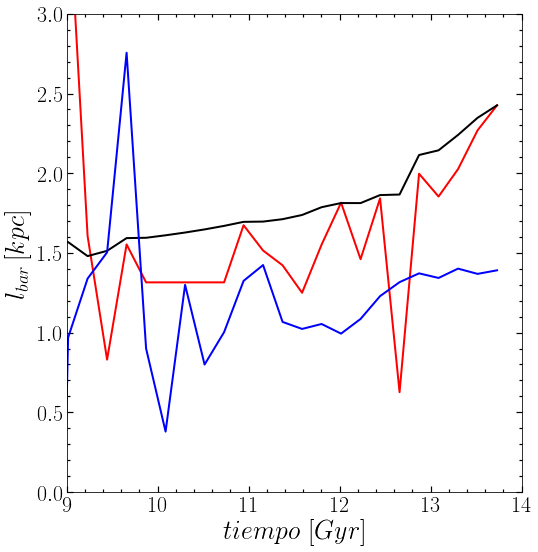

In [4]:
from __future__ import unicode_literals
import pandas

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

cm = np.loadtxt('../barra_G2/lbar_time.dat')
time0 = cm[:,1]
lbar0 = cm[:,2]

cm = np.loadtxt('../barraG2_salida/lbar_time.dat')
time1 = cm[:,1]
lbar1 = cm[:,2]

lbar_mean1=pandas.rolling_mean(lbar1, 20, min_periods=1)
lbar_mean0=pandas.rolling_mean(lbar0, 20, min_periods=1)

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time1,lbar1,'-', lw=2, color='r')
ax.plot(time1,lbar_mean1,'-', lw=2, color='k')
ax.plot(time0,lbar0,'-', lw=2, color='b')
# ax.plot(time0,lbar_mean0,'--', lw=2, color='k')
ax.set_xlim(9,14)
ax.set_ylim(0,3)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
ax.set_ylabel(r'$l_{bar}\:[kpc]$',fontsize=26)#, color='lightgray')
fig.savefig('/z/omarioni/barraG2_salida/lbar_timeMW_lines.png', dpi = 100)
plt.show()